## Importing the libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from numpy.random import uniform
from numpy import array
from numpy import concatenate
import random
import math


# Creating the dataset for first class

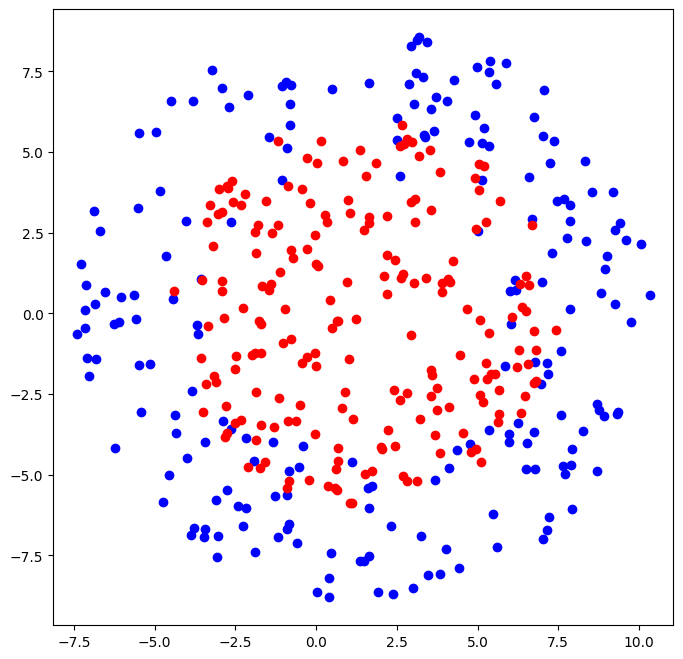

In [146]:

num_points = 200
min_radius = 4
max_radius = 9

points = []
for i in range(num_points):
    radius = min_radius + (max_radius - min_radius) * math.sqrt(random.uniform(0, 1))
    angle = random.uniform(0, 2 * math.pi)
    x = radius * math.cos(angle) + 1.5
    y = radius * math.sin(angle)
    points.append((x, y))


x_coords1 = [point[0] for point in points]
y_coords1 = [point[1] for point in points]


num_points = 200
min_radius = 0
max_radius = 6

points = []
for i in range(num_points):
    radius = min_radius + (max_radius - min_radius) * math.sqrt(random.uniform(0, 1))
    angle = random.uniform(0, 2 * math.pi)
    x = radius * math.cos(angle) + 1.5
    y = radius * math.sin(angle)
    points.append((x, y))

x_coords2 = [point[0] for point in points]
y_coords2 = [point[1] for point in points]

x_coords1 = array(x_coords1)
y_coords1 = array(y_coords1)

x_coords2 = array(x_coords2)
y_coords2 = array(y_coords2)

X =[];
for i in range(len(x_coords1)):
   X.append([x_coords1[i], y_coords1[i]])
for i in range(len(x_coords2)):
   X.append([x_coords2[i], y_coords2[i]])
X =array(X)
Y=[];
for i in range(200):
  Y.append(1)
for i in range(200):
  Y.append(2)
Y =array(Y)




plt.figure(figsize=(8, 8))
plt.scatter(x_coords1, y_coords1, color ="blue")
plt.scatter(x_coords2, y_coords2, color ="red")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('equal')
plt.show()



##Train with degree = 2

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_train.shape

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( penalty='l2',random_state =43)
classifier.fit(X_poly_train, y_train)

X_poly_test = poly.fit_transform(X_test)
y_pred = classifier.predict(X_poly_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]


In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy_score =",str(accuracy_score(y_test, y_pred)))

[[43  3]
 [ 0 34]]
accuracy_score = 0.9625


### Visualising the Training set results

<ipython-input-132-630fe0db8782>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


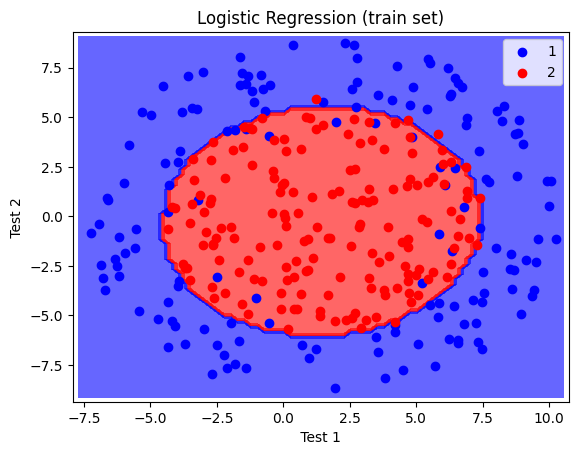

In [132]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()

### Visualising the Test set results

<ipython-input-133-a2ba553f6c98>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


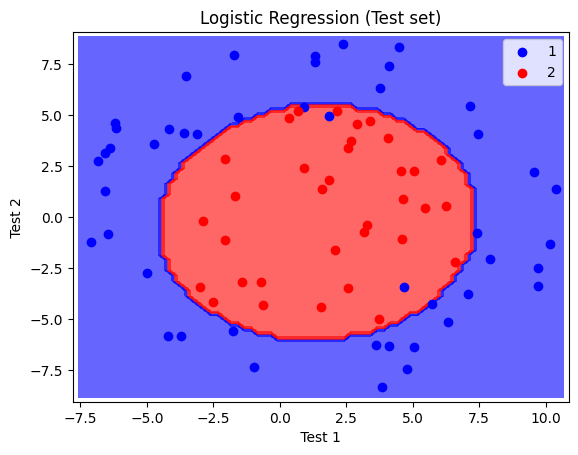

In [133]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()

##Train with degree = 35

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [148]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 35)
X_poly_train = poly.fit_transform(X_train)
X_poly_train.shape

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( penalty='l2',random_state =43)
classifier.fit(X_poly_train, y_train)

X_poly_test = poly.fit_transform(X_test)
y_pred = classifier.predict(X_poly_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [2 1]
 [1 2]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [2 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[40  6]
 [12 22]]


0.775

### Visualising the Training set results

<ipython-input-150-630fe0db8782>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


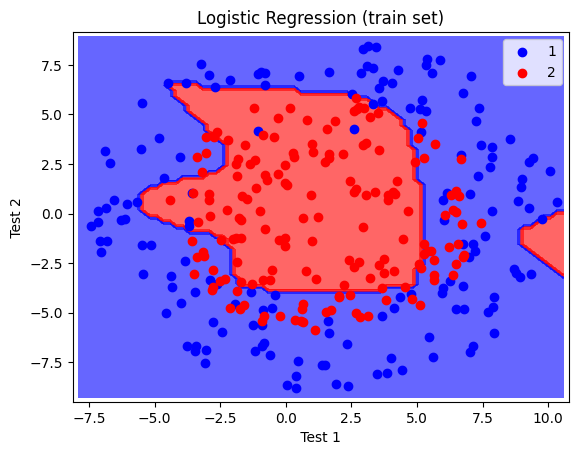

In [150]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()

### Visualising the Test set results

<ipython-input-138-a2ba553f6c98>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


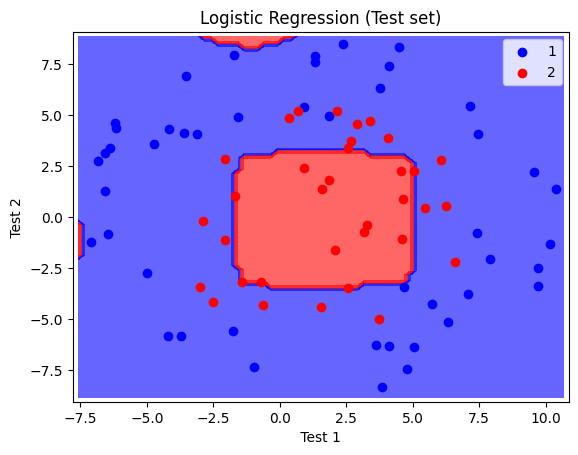

In [138]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()

# Creating the dataset for 2nd class 

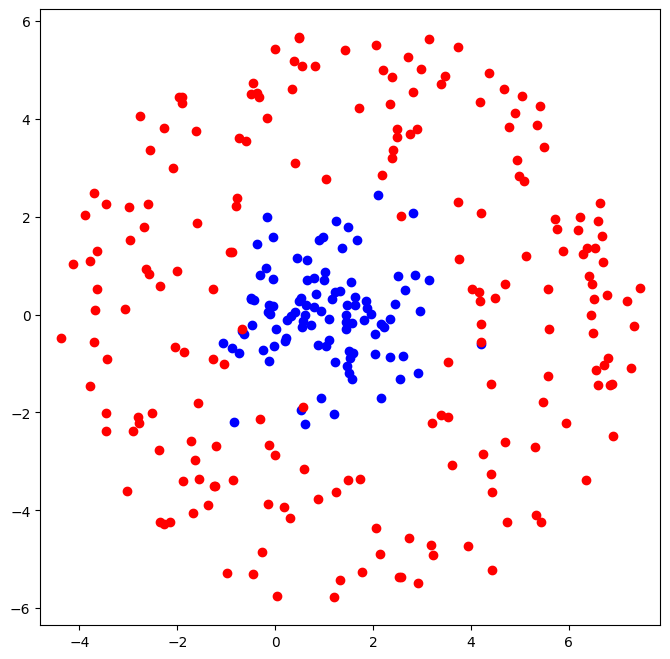

In [151]:
std_dev_X1 = 1
mean_X1 = 1
std_dev_X2 = 1
mean_X2 = 0
SAMPLE = 100
x_coords1 = np.random.normal(mean_X1, std_dev_X1, SAMPLE)
y_coords1 = np.random.normal(mean_X2, std_dev_X2, SAMPLE)


num_points = 200
min_radius = 2
max_radius = 6

points = []
for i in range(num_points):
    radius = min_radius + (max_radius - min_radius) * math.sqrt(random.uniform(0, 1))
    angle = random.uniform(0, 2 * math.pi)
    x = radius * math.cos(angle) + 1.5
    y = radius * math.sin(angle)
    points.append((x, y))

x_coords2 = [point[0] for point in points]
y_coords2 = [point[1] for point in points]

x_coords2 = array(x_coords2)
y_coords2 = array(y_coords2)

X =[];
for i in range(len(x_coords1)):
   X.append([x_coords1[i], y_coords1[i]])
for i in range(len(x_coords2)):
   X.append([x_coords2[i], y_coords2[i]])
X =array(X)
Y=[];
for i in range(100):
  Y.append(1)
for i in range(200):
  Y.append(2)
Y =array(Y)


plt.figure(figsize=(8, 8))
plt.scatter(x_coords1, y_coords1, color ="blue")
plt.scatter(x_coords2, y_coords2, color ="red")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('equal')
plt.show()

##Train with degree = 2

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_train.shape

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( penalty='l2',random_state =43)
classifier.fit(X_poly_train, y_train)

X_poly_test = poly.fit_transform(X_test)
y_pred = classifier.predict(X_poly_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]]


In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  0]
 [ 1 39]]


0.9833333333333333

### Visualising the Training set results

<ipython-input-156-630fe0db8782>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


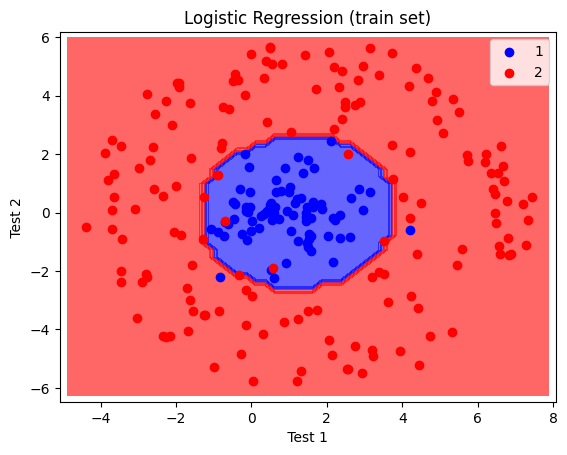

In [156]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()

### Visualising the Test set results

<ipython-input-158-a2ba553f6c98>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


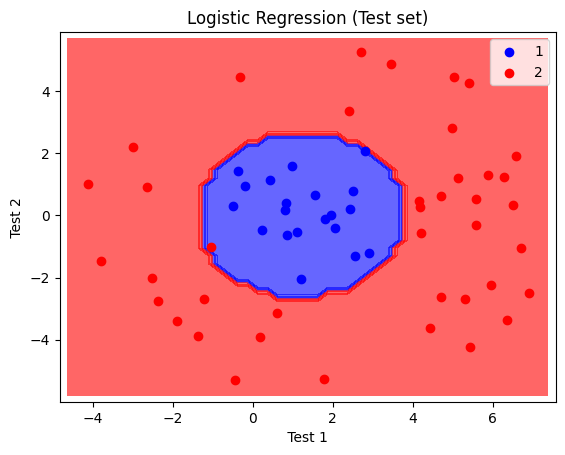

In [158]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()

##Train with degree = 35

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 35)
X_poly_train = poly.fit_transform(X_train)
X_poly_train.shape

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( penalty='l2',random_state =43)
classifier.fit(X_poly_train, y_train)

X_poly_test = poly.fit_transform(X_test)
y_pred = classifier.predict(X_poly_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  0]
 [ 1 39]]


0.9833333333333333

### Visualising the Training set results

<ipython-input-162-af873a434edf>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


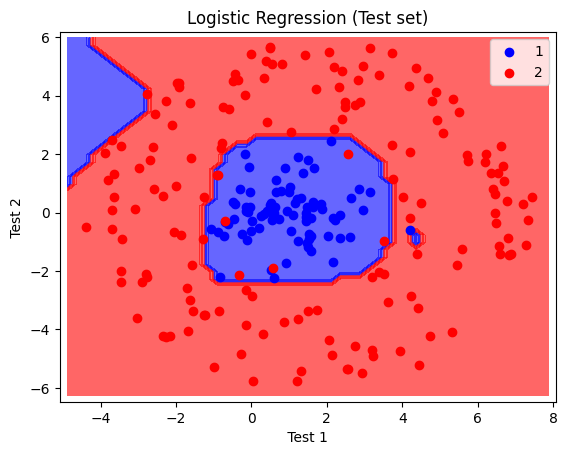

In [162]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()

### Visualising the Test set results

<ipython-input-163-a2ba553f6c98>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)


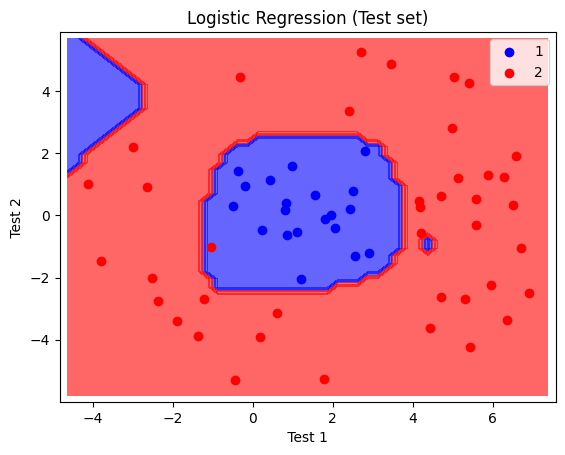

In [163]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.5, stop = X_set[:, 0].max()+ 0.5, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.5, stop = X_set[:, 1].max() + 0.5, step = 0.25))
X1 = np.array(X1, dtype=float)
X2 = np.array(X2, dtype=float)
plt.contourf(X1, X2,
          classifier.predict(poly.fit_transform(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))).reshape(X1.shape),
           alpha = 0.6, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min()-0.2 , X1.max() + 0.2)
plt.ylim(X2.min()-0.2 , X2.max() + 0.2)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel(' Test 1 ')
plt.ylabel(' Test 2 ')
plt.legend()
plt.show()